# Import Library

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Data Scraping

In [26]:
# List ticker untuk saham 10 perusahaan Indonesia
tickers = ['BBCA.JK', 'BYAN.JK', 'TPIA.JK', 'BBRI.JK', 'BMRI.JK', 'DSSA.JK', 'TLKM.JK', 'ASII.JK', 'BBNI.JK', 'ICBP.JK']

# Download data harga penutupan (adjusted close) untuk setiap perusahaan dengan interval 1 hari
stock_close_datas = {}
stock_open_datas = {}
stock_high_datas = {}
stock_low_datas = {}
stock_volume_datas = {}
for ticker in tickers:
  df = yf.download(ticker, start='2018-01-01', end='2025-05-15', interval='1d')
  stock_open_datas[ticker] = df['Open']
  stock_high_datas[ticker] = df['High']
  stock_low_datas[ticker] = df['Low']
  stock_volume_datas[ticker] = df['Volume']
  stock_close_datas[ticker] = df['Close']

# Gabung semua jadi 1 dataframe
df_all = pd.concat(stock_close_datas, axis=1)
df_all.columns = tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
df_all

,BBCA.JK,BYAN.JK,TPIA.JK,BBRI.JK,BMRI.JK,DSSA.JK,TLKM.JK,ASII.JK,BBNI.JK,ICBP.JK
Date,,,,,,,,,,
2018-01-01,3723.926025,716.897888,1457.917480,2289.992432,2592.610107,1390.0,3293.224121,5383.929199,3732.603516,7525.143555
2018-01-02,3723.926025,723.661133,1439.693726,2283.701416,2543.998535,1410.0,3270.972656,5319.061523,3685.474609,7694.249023
2018-01-03,3723.926025,723.661133,1403.245728,2271.119141,2495.387451,1390.0,3137.463623,5221.762207,3553.514648,7694.249023
2018-01-04,3779.190186,716.897888,1348.573975,2233.372314,2535.896729,1390.0,3130.046387,5335.278809,3544.088867,7715.386230
2018-01-05,3783.440430,720.279541,1385.021606,2258.537109,2535.896729,1390.0,3174.549561,5383.929199,3506.385010,7842.214844
...,...,...,...,...,...,...,...,...,...,...
2025-05-06,9025.000000,20150.000000,8700.000000,3880.000000,4980.000000,48200.0,2680.000000,4448.971191,4180.000000,11275.000000
2025-05-07,9075.000000,20225.000000,9025.000000,3910.000000,4950.000000,48700.0,2620.000000,4523.901367,4160.000000,11075.000000
2025-05-08,8975.000000,20225.000000,8875.000000,3790.000000,4790.000000,48250.0,2570.000000,4477.070312,4120.000000,11400.000000


# Data Preprocessing

## Menangani Missing Value

In [28]:
df_all.isnull().sum()

BBCA.JK    0
BYAN.JK    0
TPIA.JK    0
BBRI.JK    0
BMRI.JK    0
DSSA.JK    0
TLKM.JK    1
ASII.JK    1
BBNI.JK    0
ICBP.JK    1
dtype: int64

In [29]:
# Melihat baris yang bernilai null
df_all[df_all.isnull().any(axis=1)]

,BBCA.JK,BYAN.JK,TPIA.JK,BBRI.JK,BMRI.JK,DSSA.JK,TLKM.JK,ASII.JK,BBNI.JK,ICBP.JK
Date,,,,,,,,,,
2019-06-19,5152.052734,1153.150635,1209.519653,2880.276123,2881.317139,1450.0,NaN,NaN,3534.166992,NaN


In [30]:
df_all_ffil = df_all.ffill()
display(df_all_ffil.loc["2019-06-18"])
display(df_all_ffil.loc["2019-06-19"])

BBCA.JK    5117.359863
BYAN.JK    1160.312988
TPIA.JK    1202.114502
BBRI.JK    2860.134033
BMRI.JK    2836.155029
DSSA.JK    1450.000000
TLKM.JK    3145.500732
ASII.JK    5101.783203
BBNI.JK    3464.674805
ICBP.JK    9077.743164
Name: 2019-06-18 00:00:00, dtype: float64

BBCA.JK    5152.052734
BYAN.JK    1153.150635
TPIA.JK    1209.519653
BBRI.JK    2880.276123
BMRI.JK    2881.317139
DSSA.JK    1450.000000
TLKM.JK    3145.500732
ASII.JK    5101.783203
BBNI.JK    3534.166992
ICBP.JK    9077.743164
Name: 2019-06-19 00:00:00, dtype: float64

In [31]:
df_all_ffil.shape

(1811, 10)

## Mengganti Nama Kolom

In [32]:
df_all_ffil.columns = df_all_ffil.columns.str.replace('.JK', '', regex=False)
df_all_ffil

,BBCA,BYAN,TPIA,BBRI,BMRI,DSSA,TLKM,ASII,BBNI,ICBP
Date,,,,,,,,,,
2018-01-01,3723.926025,716.897888,1457.917480,2289.992432,2592.610107,1390.0,3293.224121,5383.929199,3732.603516,7525.143555
2018-01-02,3723.926025,723.661133,1439.693726,2283.701416,2543.998535,1410.0,3270.972656,5319.061523,3685.474609,7694.249023
2018-01-03,3723.926025,723.661133,1403.245728,2271.119141,2495.387451,1390.0,3137.463623,5221.762207,3553.514648,7694.249023
2018-01-04,3779.190186,716.897888,1348.573975,2233.372314,2535.896729,1390.0,3130.046387,5335.278809,3544.088867,7715.386230
2018-01-05,3783.440430,720.279541,1385.021606,2258.537109,2535.896729,1390.0,3174.549561,5383.929199,3506.385010,7842.214844
...,...,...,...,...,...,...,...,...,...,...
2025-05-06,9025.000000,20150.000000,8700.000000,3880.000000,4980.000000,48200.0,2680.000000,4448.971191,4180.000000,11275.000000
2025-05-07,9075.000000,20225.000000,9025.000000,3910.000000,4950.000000,48700.0,2620.000000,4523.901367,4160.000000,11075.000000
2025-05-08,8975.000000,20225.000000,8875.000000,3790.000000,4790.000000,48250.0,2570.000000,4477.070312,4120.000000,11400.000000


## Menambah Fitur Tanggal

Dilakukan pengubahan data tanggal dari index menjadi kolom date

In [33]:
df_all_ffil = df_all_ffil.reset_index()
df_all_ffil

,Date,BBCA,BYAN,TPIA,BBRI,BMRI,DSSA,TLKM,ASII,BBNI,ICBP
0,2018-01-01,3723.926025,716.897888,1457.917480,2289.992432,2592.610107,1390.0,3293.224121,5383.929199,3732.603516,7525.143555
1,2018-01-02,3723.926025,723.661133,1439.693726,2283.701416,2543.998535,1410.0,3270.972656,5319.061523,3685.474609,7694.249023
2,2018-01-03,3723.926025,723.661133,1403.245728,2271.119141,2495.387451,1390.0,3137.463623,5221.762207,3553.514648,7694.249023
3,2018-01-04,3779.190186,716.897888,1348.573975,2233.372314,2535.896729,1390.0,3130.046387,5335.278809,3544.088867,7715.386230
4,2018-01-05,3783.440430,720.279541,1385.021606,2258.537109,2535.896729,1390.0,3174.549561,5383.929199,3506.385010,7842.214844
...,...,...,...,...,...,...,...,...,...,...,...
1806,2025-05-06,9025.000000,20150.000000,8700.000000,3880.000000,4980.000000,48200.0,2680.000000,4448.971191,4180.000000,11275.000000
1807,2025-05-07,9075.000000,20225.000000,9025.000000,3910.000000,4950.000000,48700.0,2620.000000,4523.901367,4160.000000,11075.000000
1808,2025-05-08,8975.000000,20225.000000,8875.000000,3790.000000,4790.000000,48250.0,2570.000000,4477.070312,4120.000000,11400.000000
1809,2025-05-09,9000.000000,20200.000000,8525.000000,3840.000000,4770.000000,49325.0,2600.000000,4477.070312,4100.000000,11200.000000


Mari kita lihat berapa banyak hari yang tidak terdapat dalam data

In [ ]:
full_date_range = pd.date_range(start='2018-01-01', end='2025-05-14', freq='D')
df_all_ffil['Date'] = pd.to_datetime(df_all_ffil['Date'])

existing_dates = df_all_ffil['Date'].unique()

existing_dates_index = pd.DatetimeIndex(existing_dates)

missing_dates = full_date_range.difference(existing_dates_index)
missing_dates.shape

## Menangani Duplikasi Data

In [ ]:
print("Jumlah duplikasi data:", df_all_ffil.duplicated().sum())

Jumlah duplikasi data: 0


## Mengurutkan data

Karena data yang dibutuhkan merupakan data time series, maka datanya harus berurutan berdasarkan waktu (Kolom `Date`)

In [ ]:
df_all_ffil = df_all_ffil.sort_values(by="Date", ascending=True)
df_all_ffil

,Date,BBCA,BYAN,TPIA,BBRI,BMRI,DSSA,TLKM,ASII,BBNI,ICBP
0,2018-01-01,3723.926025,716.897888,1457.917480,2289.992432,2592.610107,1390.0,3293.224121,5383.929199,3732.603516,7525.143555
1,2018-01-02,3723.926025,723.661133,1439.693726,2283.701416,2543.998535,1410.0,3270.972656,5319.061523,3685.474609,7694.249023
2,2018-01-03,3723.926025,723.661133,1403.245728,2271.119141,2495.387451,1390.0,3137.463623,5221.762207,3553.514648,7694.249023
3,2018-01-04,3779.190186,716.897888,1348.573975,2233.372314,2535.896729,1390.0,3130.046387,5335.278809,3544.088867,7715.386230
4,2018-01-05,3783.440430,720.279541,1385.021606,2258.537109,2535.896729,1390.0,3174.549561,5383.929199,3506.385010,7842.214844
...,...,...,...,...,...,...,...,...,...,...,...
1806,2025-05-06,9025.000000,20150.000000,8700.000000,3880.000000,4980.000000,48200.0,2680.000000,4448.971191,4180.000000,11275.000000
1807,2025-05-07,9075.000000,20225.000000,9025.000000,3910.000000,4950.000000,48700.0,2620.000000,4523.901367,4160.000000,11075.000000
1808,2025-05-08,8975.000000,20225.000000,8875.000000,3790.000000,4790.000000,48250.0,2570.000000,4477.070312,4120.000000,11400.000000
1809,2025-05-09,9000.000000,20200.000000,8525.000000,3840.000000,4770.000000,49325.0,2600.000000,4477.070312,4100.000000,11200.000000


# Data Exploration

## Deskripsi Variabel

Setiap kolom berisi harga saham penutupan (adjusted close) dari top 20 emiten Indonesia

In [ ]:
df_all_ffil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1811 non-null   datetime64[ns]
 1   BBCA    1811 non-null   float64       
 2   BYAN    1811 non-null   float64       
 3   TPIA    1811 non-null   float64       
 4   BBRI    1811 non-null   float64       
 5   BMRI    1811 non-null   float64       
 6   DSSA    1811 non-null   float64       
 7   TLKM    1811 non-null   float64       
 8   ASII    1811 non-null   float64       
 9   BBNI    1811 non-null   float64       
 10  ICBP    1811 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 155.8 KB


Terdapat nilai null pada beberapa kolom

In [ ]:
df_all_ffil.describe()

,Date,BBCA,BYAN,TPIA,BBRI,BMRI,DSSA,TLKM,ASII,BBNI,ICBP
count,1811,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,2021-08-10 03:20:22.528989440,6575.199838,7214.450623,2981.308598,3292.208090,3455.223671,7405.251242,3125.450478,4525.809296,3368.738701,9228.664020
min,2018-01-01 00:00:00,3529.552490,591.778931,1093.920776,1513.757080,1411.886841,920.000000,2070.656006,2251.151855,1292.781494,6683.181152
25%,2019-09-25 12:00:00,5048.833740,1164.566528,1682.525879,2512.330933,2476.076660,1472.500000,2774.093994,4186.593750,2797.437378,8024.524414
50%,2021-08-05 00:00:00,6037.151367,1421.741577,2229.064209,3194.934326,2795.157471,2125.000000,3018.789062,4570.732422,3402.970947,9091.309570
75%,2023-06-13 12:00:00,8330.894043,17346.110352,2561.516602,3961.753174,4429.971680,4900.000000,3521.298340,4913.645996,3967.651367,10371.634766
max,2025-05-14 00:00:00,10570.414062,22548.173828,10625.000000,5763.100098,6769.004883,49900.000000,4295.701172,5738.723145,5460.848145,12800.000000
std,NaN,1891.525114,7880.024199,2298.569433,928.953165,1333.204637,11880.027645,467.220064,631.141289,887.597166,1388.058020


## Analisis Harga Saham Tiap Perusahaan

In [ ]:
dates = df_all_ffil['Date']
stocks = df_all_ffil.drop(columns='Date')

<Figure size 1400x600 with 0 Axes>

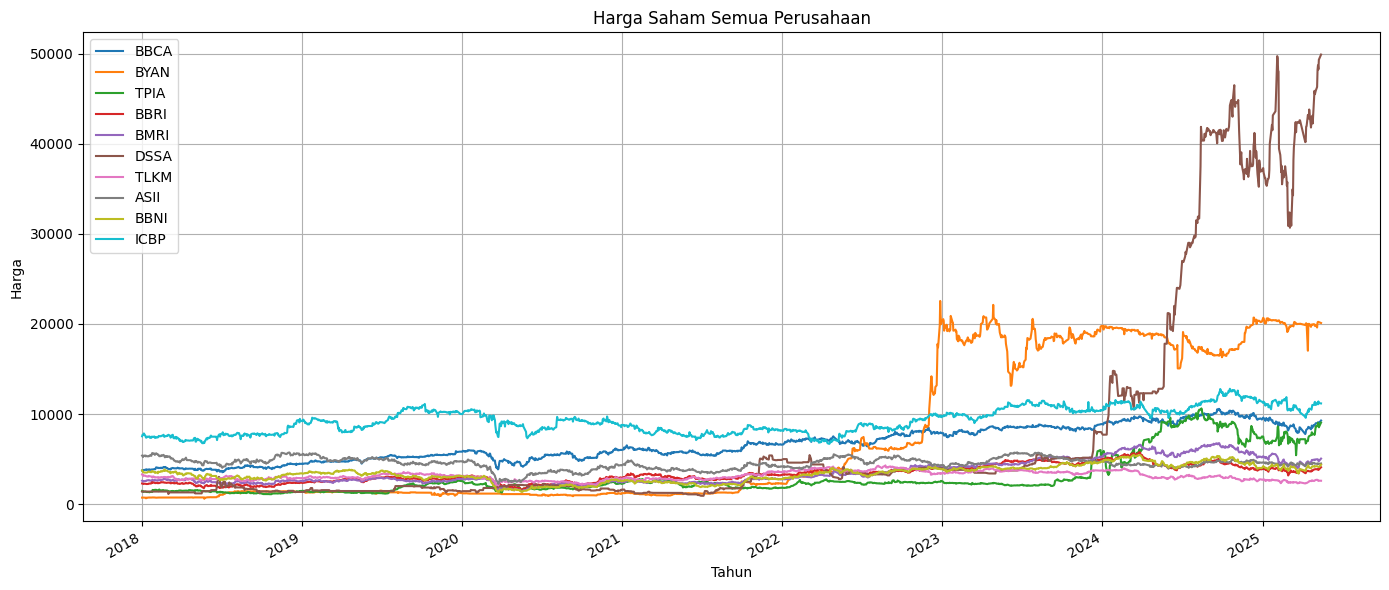

In [ ]:
plt.figure(figsize=(14, 6))
stocks.index = dates  # ubah dates jadi index
stocks.plot(figsize=(14, 6))
plt.ylabel("Harga")
plt.xlabel("Tahun")
plt.title("Harga Saham Semua Perusahaan")
plt.grid(True)
plt.tight_layout()
plt.show()

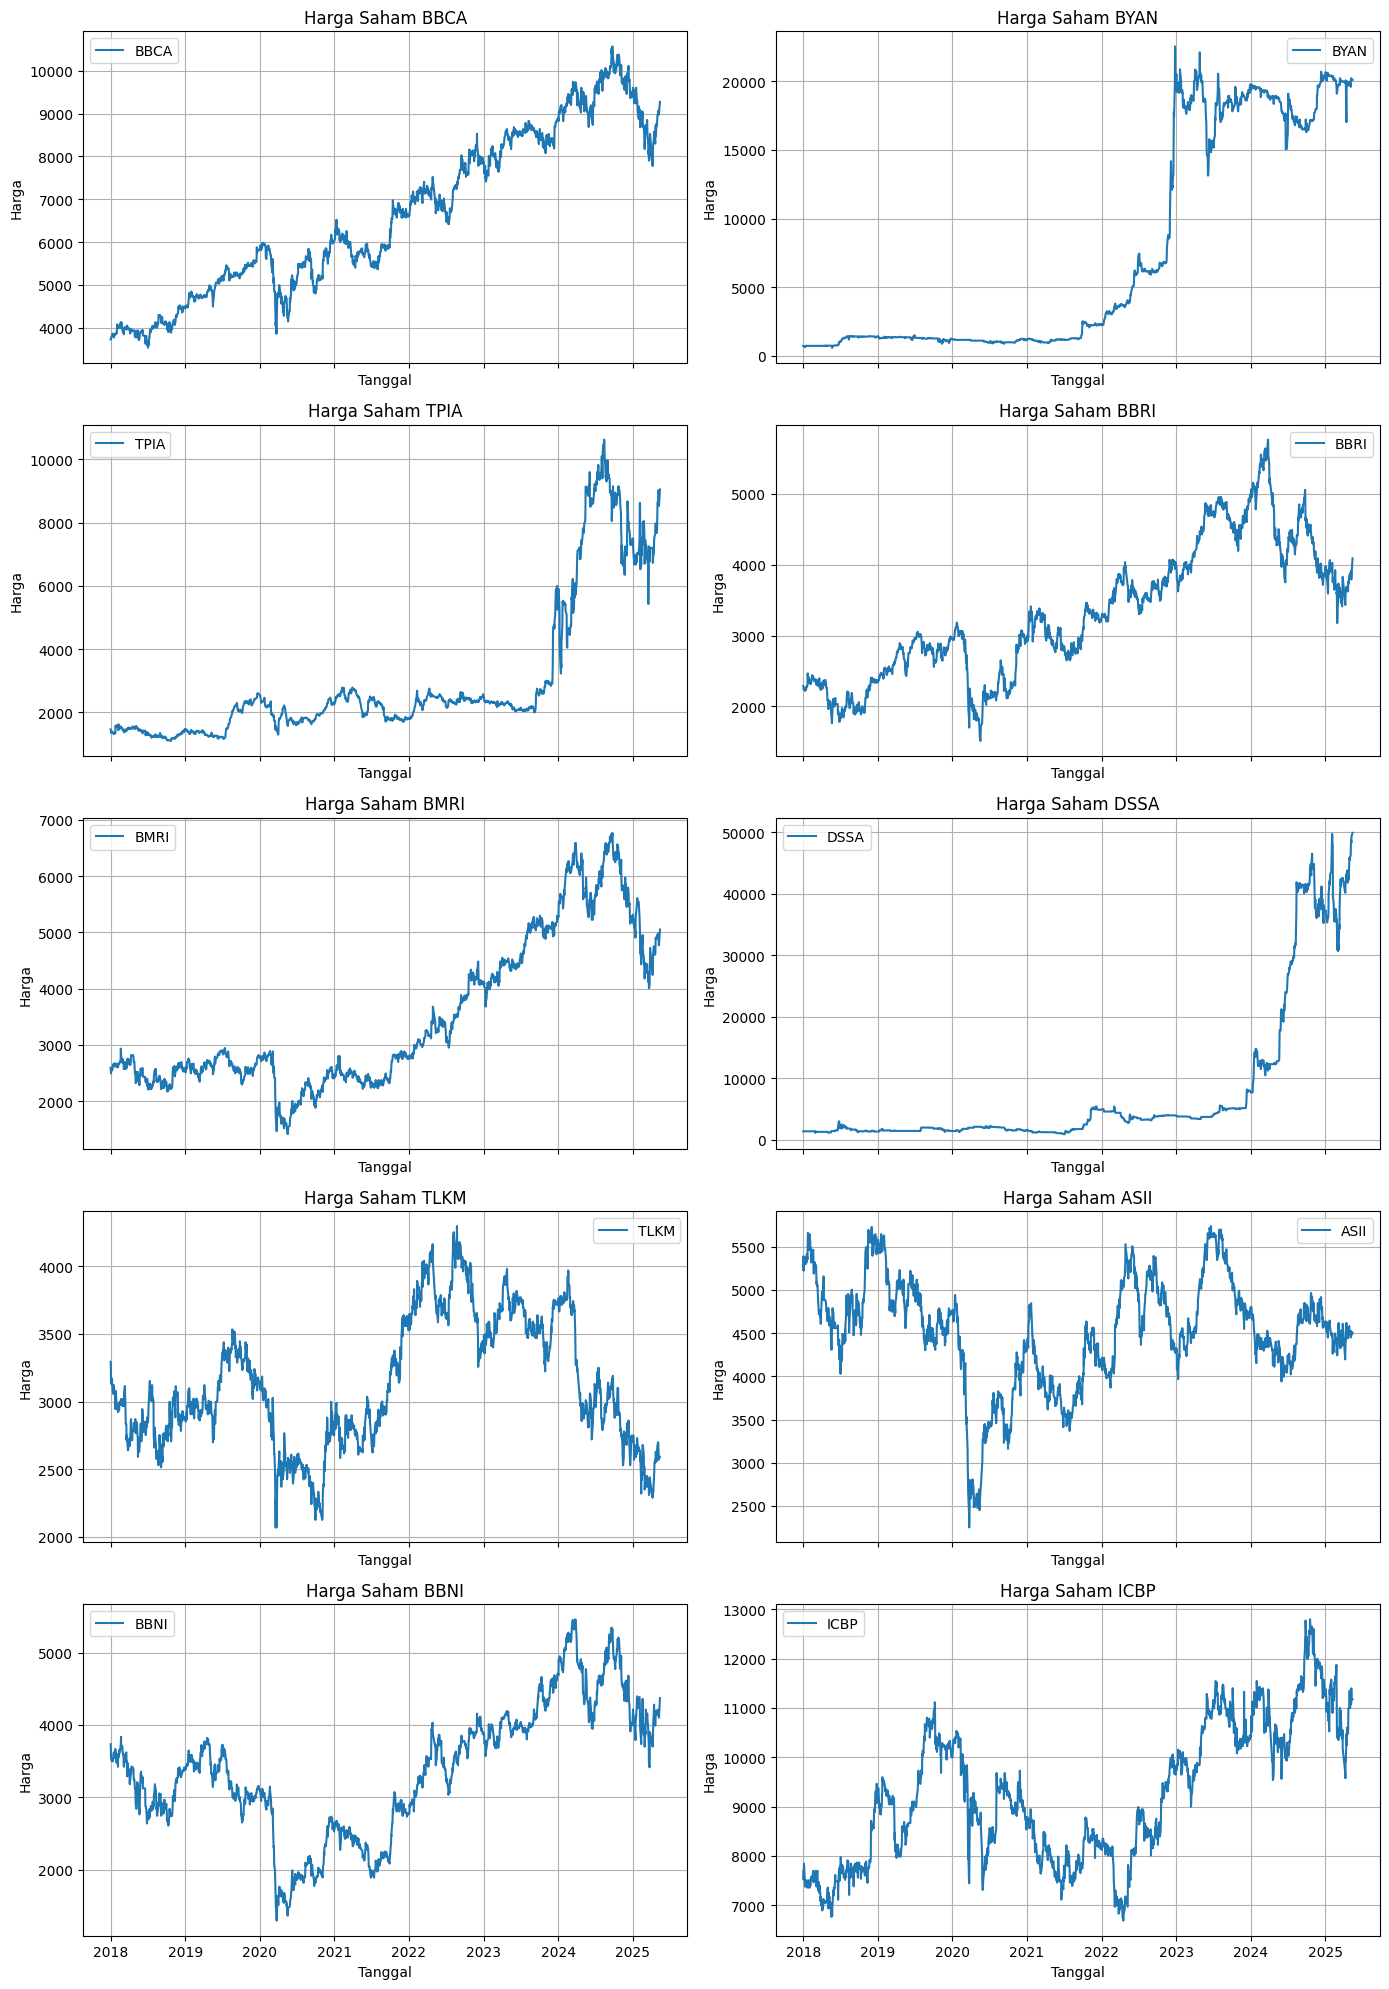

In [ ]:
num_stocks = len(stocks.columns)
cols = 2  # jumlah kolom subplot
rows = (num_stocks + cols - 1) // cols  # jumlah baris yang dibutuhkan

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()  # ubah axes jadi array datar agar mudah diakses

for i, stock in enumerate(stocks.columns):
    axes[i].plot(dates, stocks[stock], label=stock)
    axes[i].set_title(f"Harga Saham {stock}")
    axes[i].set_ylabel("Harga")
    axes[i].set_xlabel("Tanggal")
    axes[i].legend()
    axes[i].grid(True)

# Sembunyikan subplot kosong jika jumlah saham ganjil
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Korelasi Antar Saham

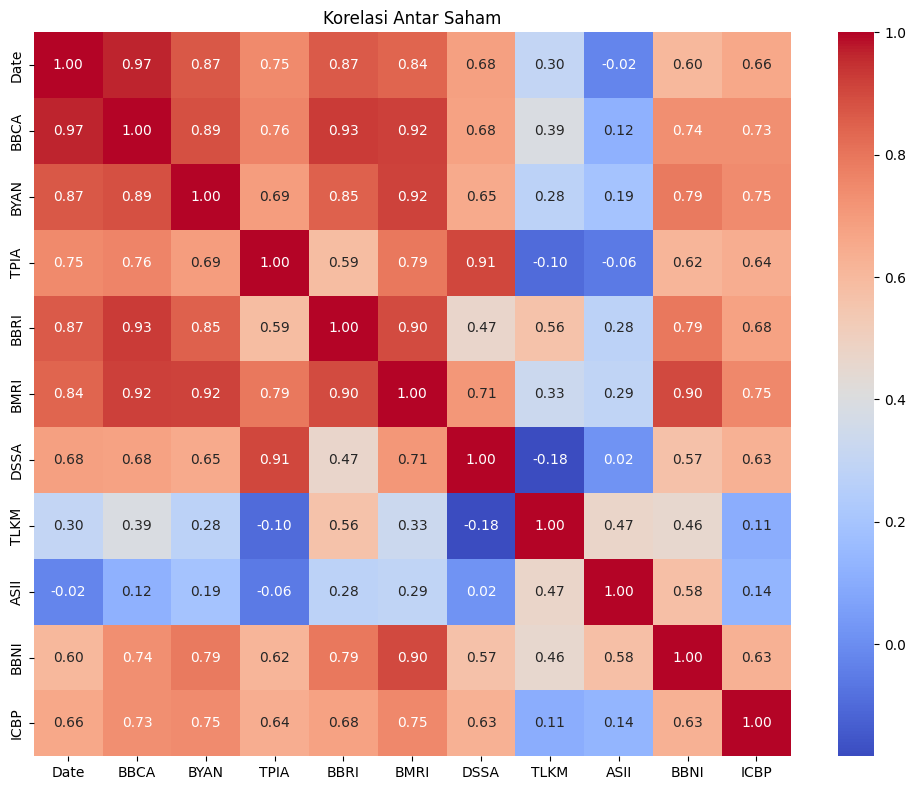

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_all_ffil.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Saham")
plt.tight_layout()
plt.show()

# Data Preparation

## Simpan Data ke Format CSV

In [ ]:
# Saving data to csv
df_all_ffil.to_csv("stocks.csv", index=False)

## Normalisasi Data

In [ ]:
scalers = {}
standardized_stocks = {}

for symbol, series in df_all_ffil.items():
    scaler = StandardScaler()
    series = series.values.reshape(-1, 1)  # Ensure 2D for scaler
    standardized = scaler.fit_transform(series)
    scalers[symbol] = scaler
    standardized_stocks[symbol] = standardized.squeeze()  # Back to 1D

## Windowing

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
combined_ds = None
for symbol, series in standardized_stocks.items():
    ds = windowed_dataset(series, window_size=30, batch_size=32, shuffle_buffer=1000)
    combined_ds = ds if combined_ds is None else combined_ds.concatenate(ds)

# Modeling